<a href="https://colab.research.google.com/github/HenriqueHideaki/RepositorioInteligenciaArtificial/blob/main/Unidade%202/QUEST%C3%83O_02_UNIDADE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2-) Considere o problema de classificação de padrões bidimensionais constituído neste caso
de 5 padrões. A distribuição dos padrões tem como base um quadrado centrado na origem
interceptando os eixos nos pontos +1 e -1 de cada eixo. Os pontos +1 e -1 de cada eixo são
centros de quatro semicírculos que se interceptam no interior do quadrado originando as
classes 1,2,3,4 e a outra classe corresponde as regiões de não interseção. Após gerar aleatoriamente
os dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação com o rótulo de cada classe. Solucione este
problema considerando uma rede perceptron de múltiplas camada. Apresente na solução a
curva do erro médio de treinamento e a curva do erro médio de teste. Apresente também a
matriz de confusão.

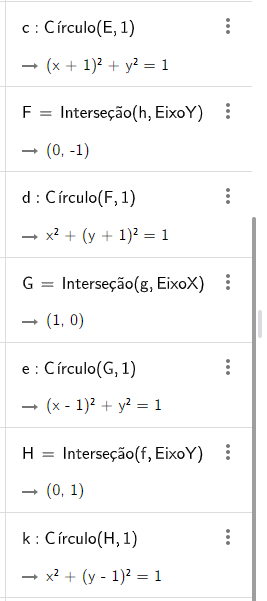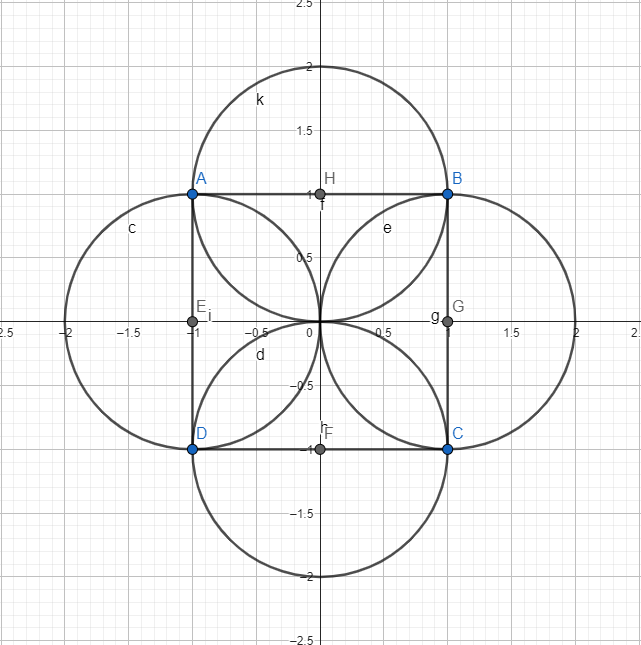

## Temos que o semi-circulo com centro em E(-1,0) pode ser descrito pela inequação (x+1)^2 + y^2 <= 1 e assim por diante.


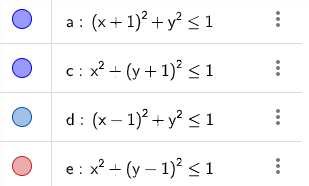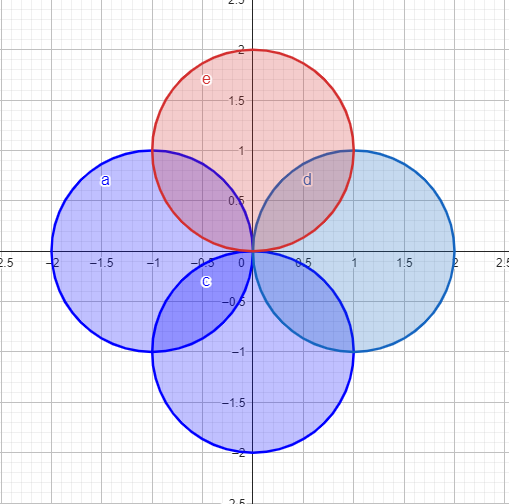

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from numpy.linalg import norm
from itertools import product

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
import tensorflow as tf

In [ ]:

def a(x, y):
    return (x + 1)**2 + y**2 <= 1
      
def c(x, y):
    return x**2 + (y + 1)**2 <= 1

def d(x,y):
    return (x - 1)**2 + y**2 <= 1

def e(x, y):
    return x**2 + (y - 1)**2 <= 1





In [ ]:
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

points = np.vstack(list(zip(x.ravel(), y.ravel())))
labels = np.array([ 
    1 if sum([a(x_i, y_i), d(x_i, y_i), c(x_i, y_i), e(x_i, y_i),]) >= 2
    else 0
    for x_i, y_i in points 
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, stratify=labels)

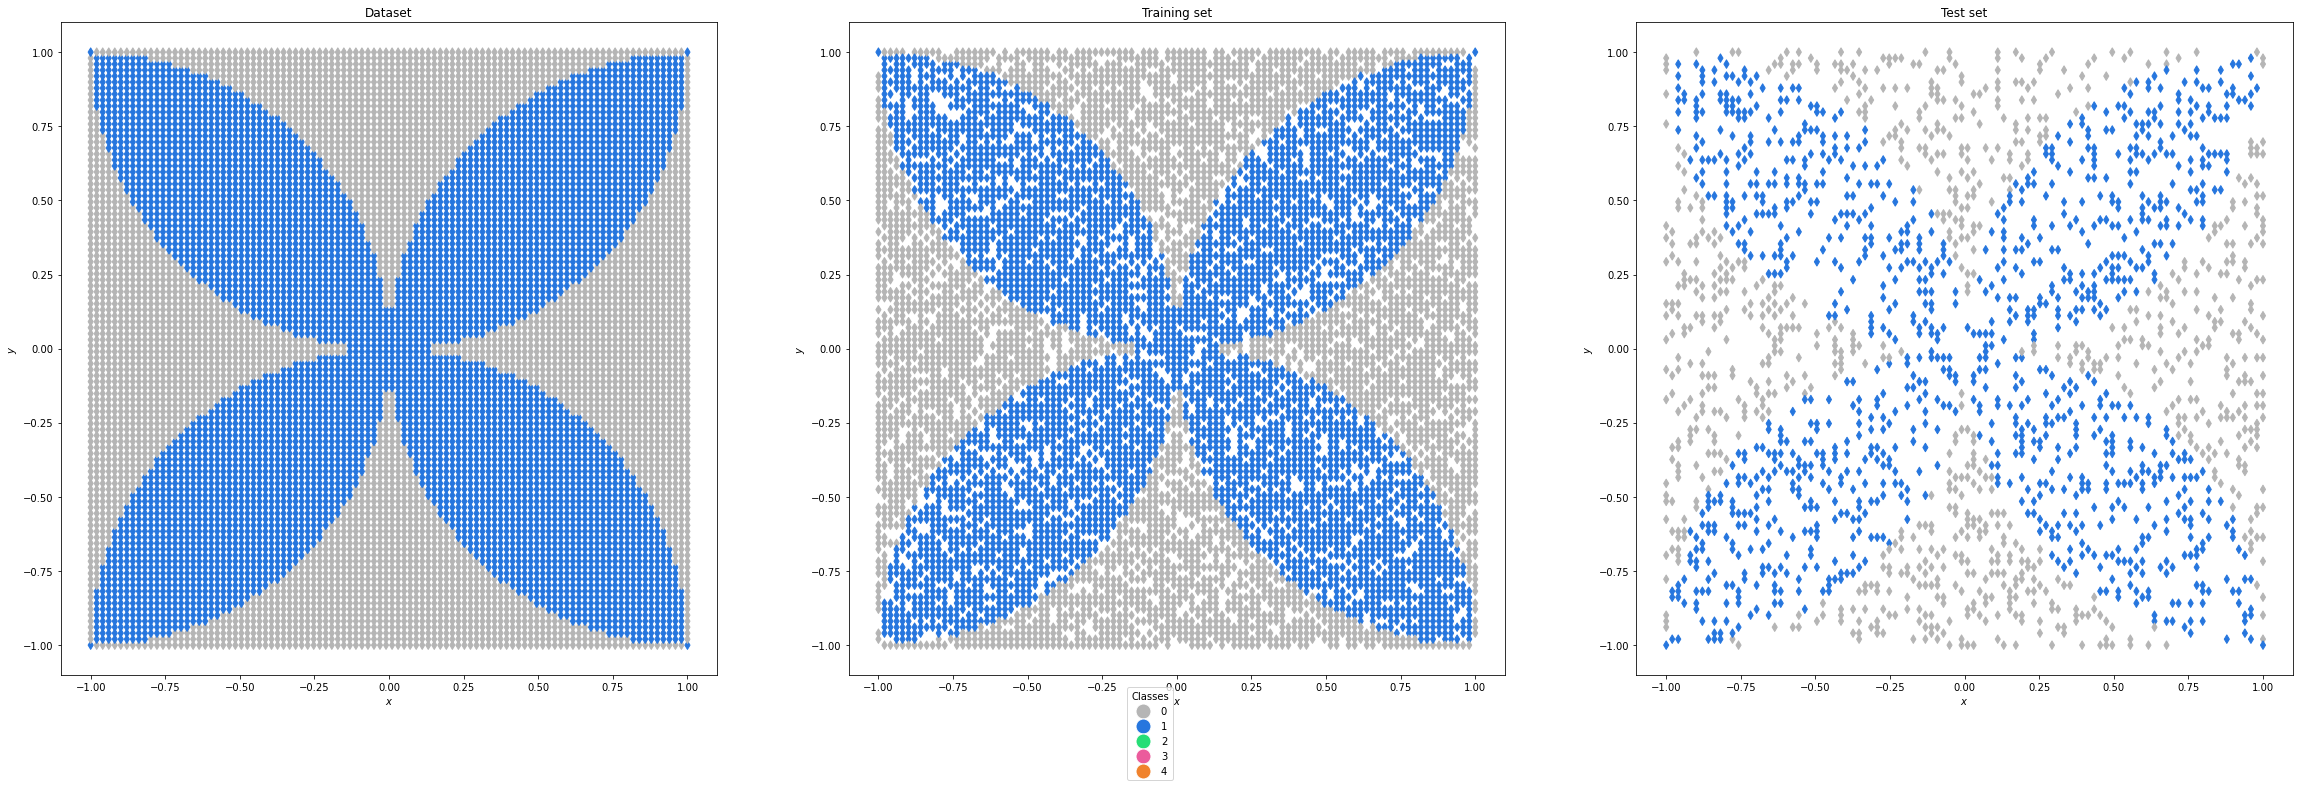

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(40, 12))

color1 = (181/255, 181/255, 181/255, 1.0)
color2 = (38/255, 118/255, 222/255, 1.0)
color3 = (38/255, 222/255, 118/255, 1.0)
color4 = (235/255, 91/255, 156/255, 1.0)
color5 = (240/255, 130/255, 44/255, 1.0)

colormap = np.array([color1, color2, color3, color4, color5])

dataset_scatter = ax[0].scatter(points[:,0], points[:,1], c=colormap[labels], marker='d')

ax[0].set(
    title='Dataset',
    xlabel='$x$',
    ylabel='$y$'
)

ax[1].scatter(x_train[:,0], x_train[:,1], c=colormap[y_train], marker='d')

ax[1].set(
    title='Training set',
    xlabel='$x$',
    ylabel='$y$'
)

ax[2].scatter(x_test[:,0], x_test[:,1], c=colormap[y_test], marker='d')

ax[2].set(
    title='Test set',
    xlabel='$x$',
    ylabel='$y$'
)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(181/255, 181/255, 181/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(38/255, 118/255, 222/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(38/255, 222/255, 118/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(235/255, 91/255, 156/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(240/255, 130/255, 44/255), markersize=15)
]

fig.legend(
    legend_elements,
    ['0', '1', '2', '3', '4'],
    loc='lower center',
    title='Classes'
)

plt.show()

In [ ]:
mlp = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)


mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                96        
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = mlp.fit(
    x_train, y_train.reshape((-1,1)),
    validation_split=0.1,
    batch_size=10,
    epochs=2000,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/2000
720/720 [==============================] - 2s 3ms/step - loss: 0.0299 - acc: 0.9949 - val_loss: 0.0395 - val_acc: 0.9887 - lr: 1.0000e-05
Epoch 2/2000
720/720 [==============================] - 2s 2ms/step - loss: 0.0299 - acc: 0.9937 - val_loss: 0.0396 - val_acc: 0.9850 - lr: 1.0000e-05
Epoch 3/2000
720/720 [==============================] - 2s 2ms/step - loss: 0.0299 - acc: 0.9943 - val_loss: 0.0397 - val_acc: 0.9862 - lr: 1.0000e-05
Epoch 4/2000
720/720 [==============================] - 2s 2ms/step - loss: 0.0299 - acc: 0.9942 - val_loss: 0.0399 - val_acc: 0.9850 - lr: 1.0000e-05
Epoch 5/2000
720/720 [==============================] - 2s 2ms/step - loss: 0.0300 - acc: 0.9937 - val_loss: 0.0395 - val_acc: 0.9850 - lr: 1.0000e-05
Epoch 6/2000
720/720 [==============================] - 2s 2ms/step - loss: 0.0299 - acc: 0.9932 - val_loss: 0.0397 - val_acc: 0.9862 - lr: 1.0000e-05
Epoch 7/2000
720/720 [==============================] - 2s 2ms/step - loss: 0.0298 - acc: 0.99

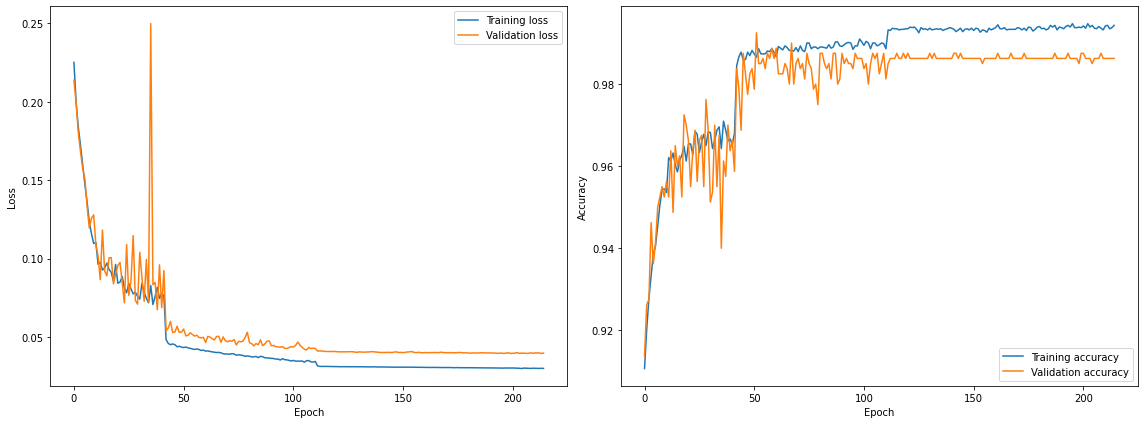

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['acc'], label='Training accuracy')
ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
threshold = 0.6

y_pred = [ 1 if pred >= threshold else 0 for pred in mlp.predict(x_test) ] 

print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       883
           1       0.99      0.98      0.99      1117

    accuracy                           0.98      2000
   macro avg       0.98      0.99      0.98      2000
weighted avg       0.98      0.98      0.98      2000



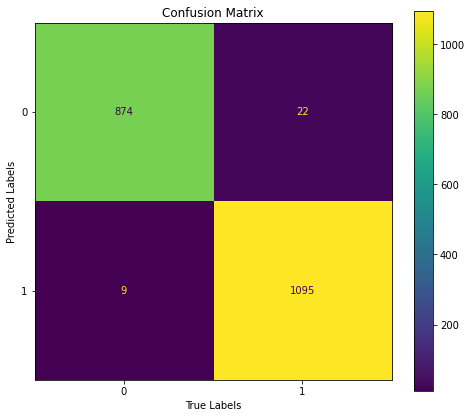

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))

ConfusionMatrixDisplay(
    confusion_matrix(y_pred, y_test, labels=[0, 1]),
    display_labels=['0', '1']
).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.show()